In [11]:
import pandas as pnd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
# Load the dataset
df = pnd.read_csv('test.csv')
#dropping the missing values
df.dropna(subset=['OriginalTweet'], inplace=True)

# Convert the text corpus into tokens
tokens = []

for tweets in df['OriginalTweet']:
    # Tokenize the tweets
    words = word_tokenize(tweets.lower())
    # Add tokens to the list
    tokens.extend(words)
print("Tokens :",tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens : ['trending', ':', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', '(', 'pictured', ',', 'wegmans', 'in', 'brooklyn', ')', ',', 'sold-out', 'online', 'grocers', '(', 'foodkick', ',', 'maxdelivery', ')', 'as', '#', 'coronavirus-fearing', 'shoppers', 'stock', 'up', 'https', ':', '//t.co/gr76pcrlwh', 'https', ':', '//t.co/ivmkmsqdt1', 'when', 'i', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', ',', 'i', 'turned', 'to', '#', 'amazon', '.', 'but', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'purell', '?', '?', '!', '!', 'check', 'out', 'how', '#', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', '.', 'https', ':', '//t.co/ygbipbflmy', 'find', 'out', 'how', 'you', 'can', 'protect', 'yourself', 'and', 'loved', 'ones', 'from', '#', 'coronavirus', '.', '?', '#', 'panic', 'buying', 'hits', '#', 'newyork', 'city', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', '&', 'amp', ';', 'medical', 'supplies', 'after', '#', 'healthcare'

In [13]:

# Perform stop word removal

stop_words = set(stopwords.words('english'))
print("stopwords:",stop_words)
clean_tokens = [word for word in tokens if word not in stop_words]
print('filtered_tokens :',clean_tokens)
# Count word frequencies
word_freq = Counter(clean_tokens)
print('word count :',word_freq)


stopwords: {'more', 'did', 'mustn', 'doing', "haven't", 'is', 'during', 'and', 'weren', 'hasn', 'once', 'no', 'the', 'i', 'doesn', 'were', 'so', 'up', 'she', "shouldn't", 'being', "hasn't", 'again', "hadn't", 'he', 'any', 'themselves', 'yourself', 'her', 'you', 'but', 'needn', 'each', 'in', 'very', 'they', 'these', 'them', 'now', "mightn't", 'shouldn', 'theirs', 'don', 'have', "wouldn't", 's', "you're", 'that', "shan't", 'him', 'has', 'was', 'to', 'not', 'some', 'own', "that'll", 'm', 'who', 'above', 'off', 'my', 'most', 'itself', "won't", 'until', 'where', 'through', 'into', "you'd", 'out', 'hers', 'which', 'been', 'his', 'aren', 'why', 'too', 'when', 'ours', 'of', 'down', 'all', 'me', "wasn't", "you've", 'a', "it's", 'after', 'over', 'than', 'd', 'or', "mustn't", 't', 'what', 'for', 'here', "didn't", 'an', 'mightn', 've', "isn't", "couldn't", 'wasn', "you'll", 'about', 'as', 'isn', 'below', 'myself', 'ma', 'with', 'our', "doesn't", 'nor', 'can', 'are', "needn't", 'this', 're', 'shan'

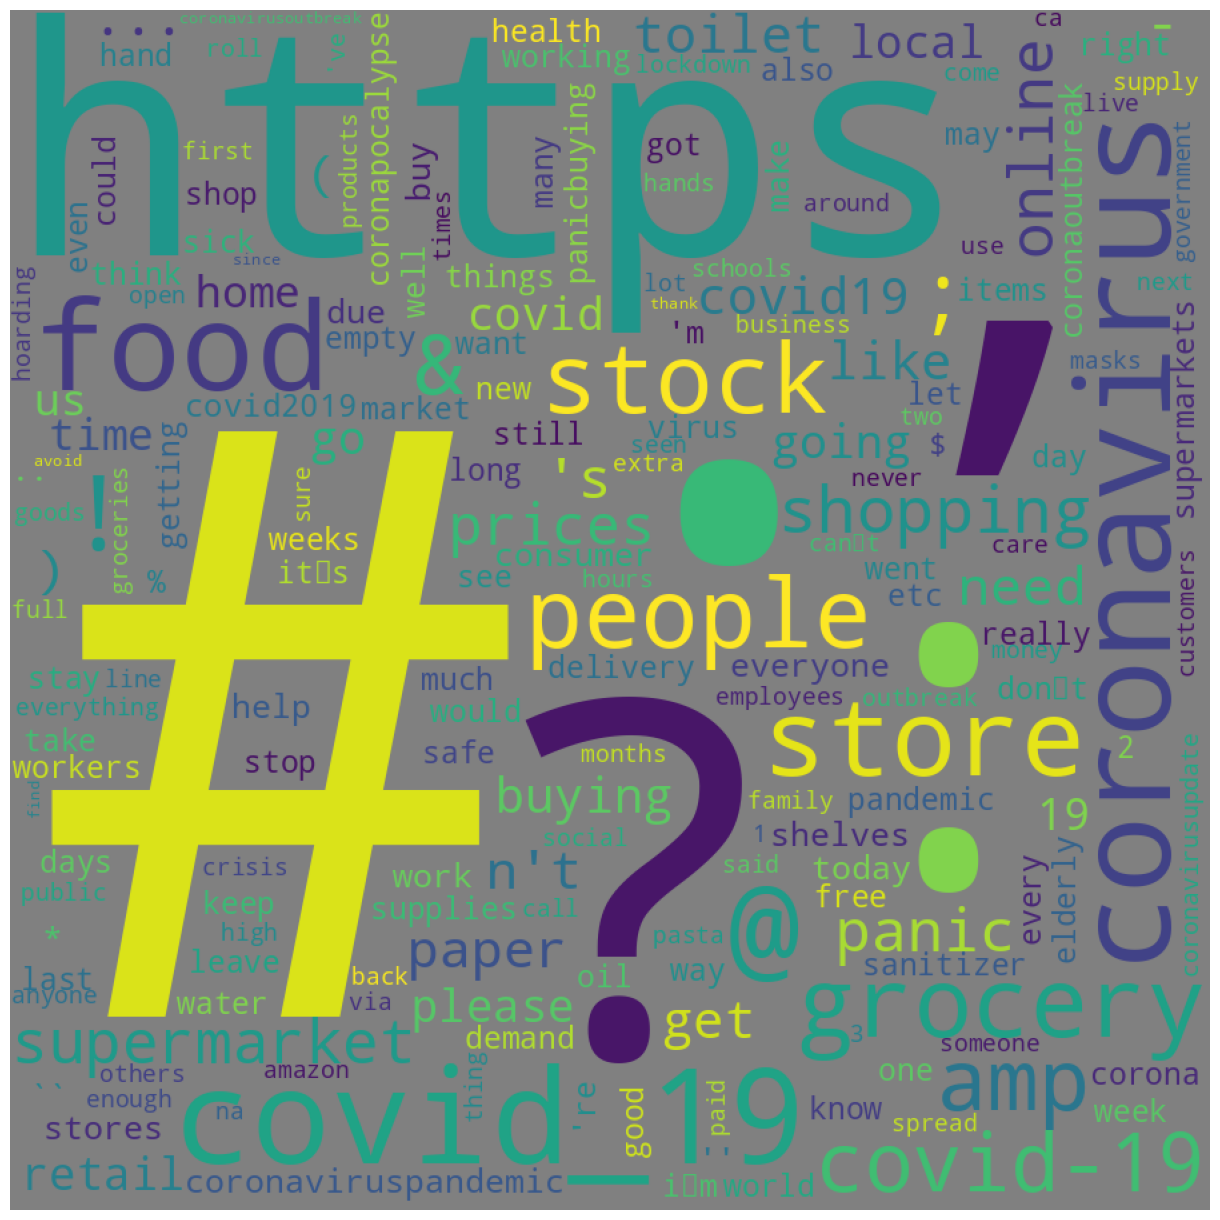

In [14]:
# Create a word cloud
wordimage = WordCloud(width = 900, height = 900, background_color ='grey',stopwords=stop_words,
                 min_font_size = 12).generate_from_frequencies(word_freq)

# Show the word cloud
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordimage)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
